# Imbalanced Datasets and Data Augmentation

In [30]:
import matplotlib.pyplot as plt
# Import necessary libraries
import numpy as np
import pandas as pd
import seaborn as sns
from collections import Counter

In [31]:
# Generating an imbalanced dataset
from sklearn.datasets import make_classification

X, y = make_classification(n_classes=2, class_sep=2, weights=[0.9, 0.1],
                           n_informative=3, n_redundant=1, flip_y=0,
                           n_features=10, n_clusters_per_class=1, n_samples=1000, random_state=42)

print("Class distribution:", Counter(y))

Class distribution: Counter({0: 900, 1: 100})


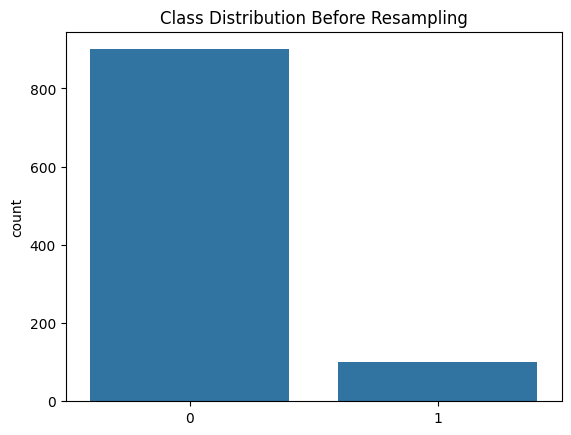

In [32]:
# Plot the class distribution
sns.countplot(x=y)
plt.title("Class Distribution Before Resampling")
plt.show()

## Handling Imbalance: Oversampling with SMOTE


In [33]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

print("Class distribution after SMOTE:", Counter(y_resampled))

Class distribution after SMOTE: Counter({0: 900, 1: 900})


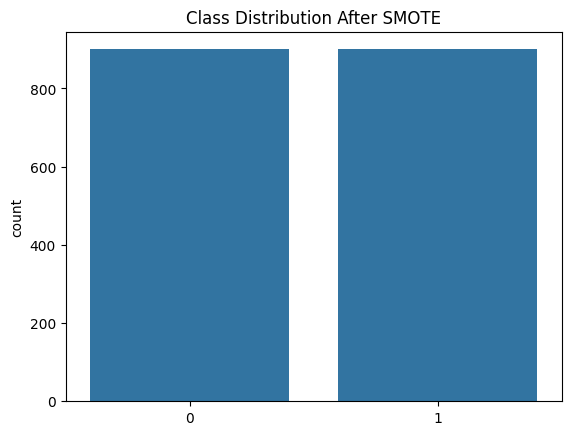

In [34]:
sns.countplot(x=y_resampled)
plt.title("Class Distribution After SMOTE")
plt.show()

## Handling Imbalance: Oversampling with RandomOverSampler


Class distribution after RandomOverSampler: Counter({0: 900, 1: 900})


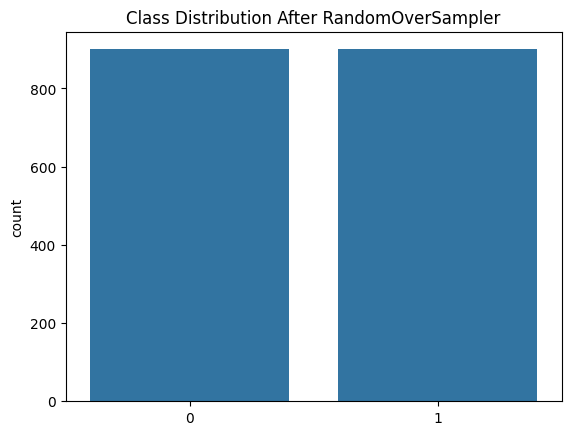

In [35]:
from imblearn.over_sampling import RandomOverSampler

ros = RandomOverSampler(random_state=42)
X_resampled_ros, y_resampled_ros = ros.fit_resample(X, y)

print("Class distribution after RandomOverSampler:", Counter(y_resampled_ros))
sns.countplot(x=y_resampled_ros)
plt.title("Class Distribution After RandomOverSampler")
plt.show()

In [36]:
"""
### Exercise: Apply Different Oversampling Techniques
Try implementing different oversampling techniques such as ADASYN

**Hint:** Use `from imblearn.over_sampling import ADASYN`.
"""
from sklearn.datasets import load_iris
from imblearn.datasets import make_imbalance

"""
Use the IRIS dataset

iris = load_iris()
X, y = make_imbalance(
    iris.data,
    iris.target,
    sampling_strategy={0: 25, 1: 50, 2: 50},
    random_state=42,
)
"""

'\nUse the IRIS dataset\n\niris = load_iris()\nX, y = make_imbalance(\n    iris.data,\n    iris.target,\n    sampling_strategy={0: 25, 1: 50, 2: 50},\n    random_state=42,\n)\n'

## Handling Imbalance: Undersampling with RandomUnderSampler

In [37]:
from imblearn.under_sampling import RandomUnderSampler

undersampler = RandomUnderSampler(random_state=42)
X_undersampled, y_undersampled = undersampler.fit_resample(X, y)

print("Class distribution after undersampling:", Counter(y_undersampled))

Class distribution after undersampling: Counter({0: 100, 1: 100})


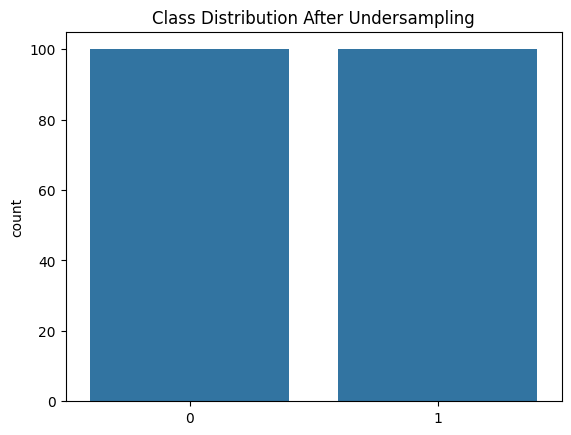

In [38]:
sns.countplot(x=y_undersampled)
plt.title("Class Distribution After Undersampling")
plt.show()

## Handling Imbalance: Undersampling with Cluster Centroids

Class distribution after Cluster Centroids: Counter({0: 100, 1: 100})


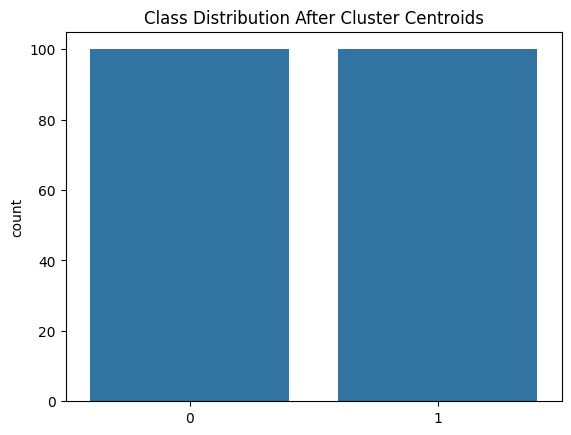

In [39]:
from imblearn.under_sampling import ClusterCentroids

cc = ClusterCentroids(random_state=42)
X_cc, y_cc = cc.fit_resample(X, y)

print("Class distribution after Cluster Centroids:", Counter(y_cc))
sns.countplot(x=y_cc)
plt.title("Class Distribution After Cluster Centroids")
plt.show()

In [40]:
"""
### Exercise: Compute Alternative Metrics
Implement functions to compute precision, recall, and F1-score.
Calculate the precision, recall, and F1-score for the imbalanced dataset.
Calculate the precision, recall, and F1-score for each newly balanced dataset.

**Hint:** Use the formulas:
- Precision = TP / (TP + FP)
- Recall = TP / (TP + FN)
- F1-score = 2 * (Precision * Recall) / (Precision + Recall)
"""

'\n### Exercise: Compute Alternative Metrics\nImplement functions to compute precision, recall, and F1-score.\nCalculate the precision, recall, and F1-score for the imbalanced dataset.\nCalculate the precision, recall, and F1-score for each newly balanced dataset.\n\n**Hint:** Use the formulas:\n- Precision = TP / (TP + FP)\n- Recall = TP / (TP + FN)\n- F1-score = 2 * (Precision * Recall) / (Precision + Recall)\n'

# Data Augmentation (Adding noise)

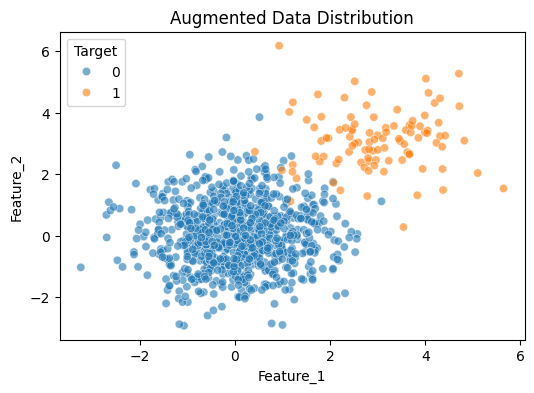

In [41]:
# Data Augmentation Example (Adding noise)
def add_noise(data, noise_level=0.1):
    noise = np.random.normal(scale=noise_level, size=data.shape)
    return data + noise


# Generate an imbalanced dataset
np.random.seed(42)
size = 1000
class_0 = np.random.normal(loc=0, scale=1, size=(int(size * 0.9), 2))  # Majority class
class_1 = np.random.normal(loc=3, scale=1, size=(int(size * 0.1), 2))  # Minority class

data_0 = pd.DataFrame(class_0, columns=['Feature_1', 'Feature_2'])
data_0['Target'] = 0
data_1 = pd.DataFrame(class_1, columns=['Feature_1', 'Feature_2'])
data_1['Target'] = 1
df = pd.concat([data_0, data_1]).sample(frac=1).reset_index(drop=True)

df_augmented = df.copy()
df_augmented.loc[df_augmented['Target'] == 1, ['Feature_1', 'Feature_2']] = add_noise(
    df_augmented[df_augmented['Target'] == 1][['Feature_1', 'Feature_2']])

# Visualizing augmented data
plt.figure(figsize=(6, 4))
sns.scatterplot(x=df_augmented['Feature_1'], y=df_augmented['Feature_2'], hue=df_augmented['Target'], alpha=0.6)
plt.title('Augmented Data Distribution')
plt.show()

In [42]:
"""
### Exercise: Analyze the Impact of Class Distribution
Manually adjust the proportion of class 1 in the dataset (e.g., increase from 10% to 20%) and observe how it affects data visualization.
"""


'\n### Exercise: Analyze the Impact of Class Distribution\nManually adjust the proportion of class 1 in the dataset (e.g., increase from 10% to 20%) and observe how it affects data visualization.\n'